In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [11]:
filepath = "week6/data/arctic_communities.geojson"
df = gpd.read_file(filepath)

In [12]:
df

,admin,country,n_communities,geometry
0,United States of America,US,115,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."
1,United Kingdom,GB,96,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51..."
2,Sweden,SE,133,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57..."
3,Russia,RU,774,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ..."
4,Norway,NO,48,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69..."
5,Lithuania,LT,26,"MULTIPOLYGON (((20.95781 55.27891, 20.89980 55..."
6,Latvia,LV,25,"POLYGON ((26.59355 55.66753, 26.54287 55.67241..."
7,Iceland,IS,5,"POLYGON ((-15.54312 66.22852, -15.42847 66.224..."
8,Finland,FI,99,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65..."
9,Estonia,EE,14,"MULTIPOLYGON (((27.35195 57.52813, 27.32656 57..."


In [4]:
unique_geom = df.geom_type.unique()

In [5]:
if len(unique_geom) != 1:
    print(f'Multiple feature types: {unique_geom}')
else:
    print(f'All features are: {unique_geom}')

Multiple feature types: ['MultiPolygon' 'Polygon']


In [6]:
def check_polygons(df):
    unique_geom = df.geom_type.unique()
    if len(unique_geom) != 1:
        print(f'Multiple feature types: {unique_geom}')
    else:
        print(f'All features are: {unique_geom}')

check_polygons(df)

Multiple feature types: ['MultiPolygon' 'Polygon']


In [13]:
df = df.explode(index_parts = False).reset_index(drop = True)

In [14]:
df

,admin,country,n_communities,geometry
0,United States of America,US,115,"POLYGON ((-132.74687 56.52568, -132.75762 56.5..."
1,United States of America,US,115,"POLYGON ((-132.77988 56.24727, -132.83096 56.2..."
2,United States of America,US,115,"POLYGON ((-134.31274 58.22891, -134.31987 58.2..."
3,United States of America,US,115,"POLYGON ((-145.11851 60.33711, -145.15049 60.3..."
4,United States of America,US,115,"POLYGON ((-144.56563 59.81841, -144.61357 59.8..."
...,...,...,...,...
476,Canada,CA,7,"POLYGON ((-109.16641 67.98237, -109.05391 67.9..."
477,Canada,CA,7,"POLYGON ((-108.09272 67.00518, -107.96646 66.9..."
478,Canada,CA,7,"POLYGON ((-109.32314 67.99087, -109.36084 67.9..."
479,Canada,CA,7,"POLYGON ((-139.04312 69.57690, -139.12573 69.5..."


In [9]:
check_polygons(df)

All features are: ['Polygon']


In [19]:
df.iloc[0]
# Type = series

index                                                            0
admin                                     United States of America
country                                                         US
n_communities                                                  115
geometry         POLYGON ((-132.746875 56.525683593749996, -132...
Name: 0, dtype: object

In [20]:
df.loc[0, "geometry"].type

/tmp/ipykernel_3070356/337071398.py:1: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  df.loc[0, "geometry"].type


'Polygon'

In [22]:
df.loc[0, "geometry"].bounds()

TypeError: 'tuple' object is not callable

In [23]:
bounds?

Object `bounds` not found.


In [30]:
import shapely as shply

In [39]:
southern_bound = shply.bounds(df.loc[0, "geometry"])
southern_bound[1]

56.511035156249996

In [45]:
df.loc[0, "geometry"].bounds[1]

56.511035156249996

In [15]:
def min_y(i):
    southern_bound = i.geometry.bounds[1]
    return(southern_bound)


min_y(df.iloc[3])

60.312646484374994

In [19]:
df['min_y'] = df.apply(func = min_y, axis=1)
df

,admin,country,n_communities,geometry,min_y
0,United States of America,US,115,"POLYGON ((-132.74687 56.52568, -132.75762 56.5...",56.511035
1,United States of America,US,115,"POLYGON ((-132.77988 56.24727, -132.83096 56.2...",56.244141
2,United States of America,US,115,"POLYGON ((-134.31274 58.22891, -134.31987 58.2...",58.204102
3,United States of America,US,115,"POLYGON ((-145.11851 60.33711, -145.15049 60.3...",60.312646
4,United States of America,US,115,"POLYGON ((-144.56563 59.81841, -144.61357 59.8...",59.812646
...,...,...,...,...,...
476,Canada,CA,7,"POLYGON ((-109.16641 67.98237, -109.05391 67.9...",67.878809
477,Canada,CA,7,"POLYGON ((-108.09272 67.00518, -107.96646 66.9...",66.857812
478,Canada,CA,7,"POLYGON ((-109.32314 67.99087, -109.36084 67.9...",67.987598
479,Canada,CA,7,"POLYGON ((-139.04312 69.57690, -139.12573 69.5...",69.539307


In [24]:
arctic_countries = df[df['min_y'] >= 40]

In [26]:
arctic_countries = arctic_countries.to_crs('epsg:3413')

<Axes: >

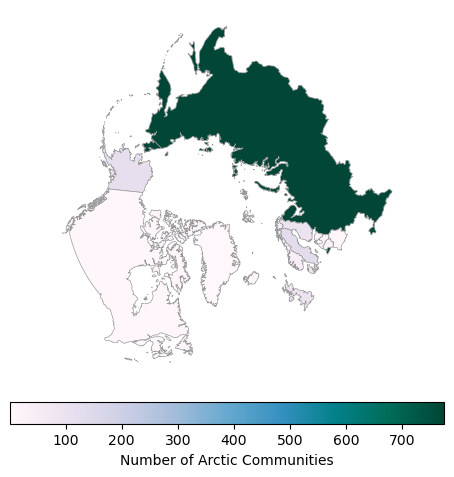

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of communities
# Plot with refined color and edge style
arctic_countries.plot(
    ax=ax,
    column='n_communities',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)